<a href="https://colab.research.google.com/github/ayudixit/ML_Training/blob/main/K_Means_Clustering_For_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

    Student ID        Name  Age   GPA  Cluster
0            1   Student 1   24  3.79        1
1            2   Student 2   21  3.52        1
2            3   Student 3   22  3.18        1
3            4   Student 4   24  2.52        2
4            5   Student 5   20  3.91        1
5            6   Student 6   22  3.34        1
6            7   Student 7   22  3.08        2
7            8   Student 8   24  2.52        2
8            9   Student 9   19  2.85        0
9           10  Student 10   20  2.86        0
10          11  Student 11   24  3.52        1
11          12  Student 12   20  3.41        0
12          13  Student 13   20  3.75        1
13          14  Student 14   22  2.76        2
14          15  Student 15   21  3.09        0
15          16  Student 16   20  2.77        0
16          17  Student 17   23  3.63        1
17          18  Student 18   22  3.14        2
18          19  Student 19   19  2.81        0
19          20  Student 20   21  3.35        1
20          2

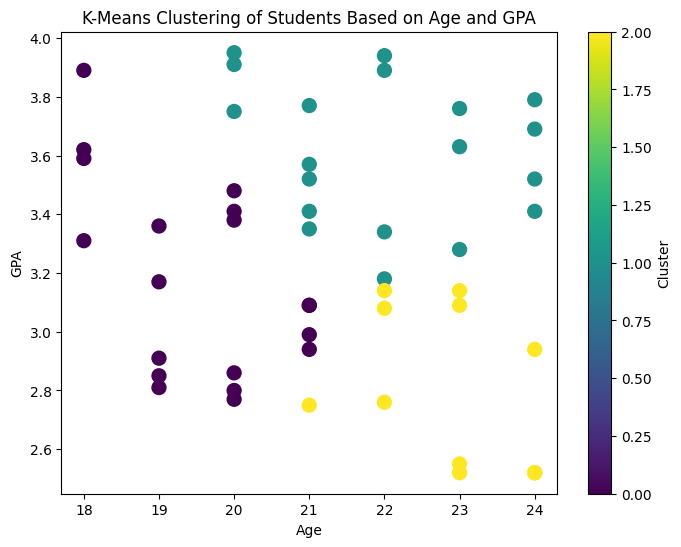

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
np.random.seed(42)
num_students = 50  # Number of students
ages = np.random.randint(18, 25, size=num_students)  # Ages between 18 and 25
gpas = np.round(np.random.uniform(2.5, 4.0, size=num_students), 2)  # GPAs between 2.5 and 4.0
grades = np.random.choice(['A', 'B', 'C'], size=num_students)  # Random grades
departments = np.random.choice(['Computer Science', 'Mathematics', 'Physics', 'Chemistry'], size=num_students)
student_data = {
    'Student ID': range(1, num_students + 1),
    'Name': [f'Student {i}' for i in range(1, num_students + 1)],
    'Department': departments,
    'Age': ages,
    'Grade': grades,
    'GPA': gpas
}

df = pd.DataFrame(student_data)
csv_file_path = '/content/student.csv'
df.to_csv(csv_file_path, index=False)
df = pd.read_csv(csv_file_path)
features = df[['Age', 'GPA']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)
print(df[['Student ID', 'Name', 'Age', 'GPA', 'Cluster']])
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['GPA'], c=df['Cluster'], cmap='viridis', s=100)
plt.xlabel('Age')
plt.ylabel('GPA')
plt.title('K-Means Clustering of Students Based on Age and GPA')
plt.colorbar(label='Cluster')
plt.show()